## Kfold cross validation

In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
names=['preg','plas','pres','skin','test','mass','pedi','age','class']
df=read_csv("/content/drive/MyDrive/MODEL_SELECTION_KFOLD/pima-indians-diabetes+%281%29.csv",names=names,skiprows=1)

In [3]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
df.shape

(768, 9)

In [4]:
x=df.drop('class',axis=1)
y=df['class']

In [5]:
x.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [17]:
K=50
seed=7
kfold=KFold(n_splits=K,shuffle=True,random_state=seed)
model=LogisticRegression()
results=cross_val_score(model,x,y,cv=kfold)
print(results)
mean_results=np.round(results.mean()*100,decimals=3)
std_results=np.round(results.std()*100,decimals=3)
print(f"accuracy:{mean_results}%,{std_results}%")

[0.6875     0.8125     0.8125     0.9375     0.875      0.625
 0.8125     0.875      0.625      0.625      0.875      0.75
 0.75       0.8125     0.625      0.875      0.9375     0.875
 0.6        0.73333333 0.86666667 0.73333333 0.86666667 0.73333333
 0.86666667 0.73333333 0.8        0.86666667 0.66666667 0.73333333
 0.4        0.66666667 0.6        0.93333333 0.73333333 0.8
 0.8        0.8        0.66666667 0.93333333 0.8        1.
 0.66666667 0.93333333 0.66666667 0.73333333 0.8        0.8
 0.66666667 0.66666667]
accuracy:76.908%,11.538%


In [9]:
type(results)

numpy.ndarray

##### purpose of claculating the mean and std devation is that how much well my model is going to perform in worse and best case:
##### worse case amy be 77.908-11.538 and best case can be 77.908+11.538

### Leve one out cross validation

In [ ]:
#leave one record out for testing
#repaeat the process n times n times where n is total no of observation

In [14]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [18]:
#define cross validation to be used
cv=LeaveOneOut()
model=LogisticRegression()
results=cross_val_score(model,x,y,cv=cv)
print(results)
mean_results=np.round(results.mean()*100,decimals=3)
std_results=np.round(results.std()*100,decimals=3)
print(f"accuracy:{mean_results}%,{std_results}%")

[1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.

In [20]:
len(results)

768

### Model optimization for grid search and hyperparameter tuning

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from pandas import read_csv

In [4]:
names=['preg','plas','pres','skin','test','mass','pedi','age','class']
df=read_csv("/content/drive/MyDrive/MODEL_SELECTION_KFOLD/pima-indians-diabetes+%281%29.csv",names=names,skiprows=1)

In [5]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
x=df.drop('class',axis=1)
y=df['class']

#### Divide the data into 3 parts
#### Training,testing and cross_validation

In [7]:
#save 20% of data sets for final testing
#use rest of 80% for training and validation
#steps
#1.first divide the datasets into 80:20 ratio(training and testing)
#2.next divide the 8o part into training and validation(what ever ratio you prefer)
x_train1,x_test,y_train1,y_test=train_test_split(x,y,test_size=.20,random_state=1)
x_train2,x_val,y_train2,y_val=train_test_split(x_train1,y_train1,test_size=.25,random_state=1)

In [10]:
print("total Datasets:",len(x.values))
print("total test Datasets for future use:",len(x_test.values))
print("total training Datasets:",len(x_train2.values))
print("total validation Datasets:",len(x_val.values))

total Datasets: 768
total test Datasets for future use: 154
total training Datasets: 460
total validation Datasets: 154


In [11]:
154+460+154

768

In [12]:
#k-nearest classifiers
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train2,y_train2)

KNeighborsClassifier()

In [13]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [14]:
params_grid={
    'n_neighbors':list(range(1,8)),
    'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute')  
}

In [15]:
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(knn_clf,params_grid,cv=20)


In [16]:
gs.fit(x_train2,y_train2)

GridSearchCV(cv=20, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7]})

In [17]:
gs.best_params_

{'algorithm': 'auto', 'n_neighbors': 7}

In [18]:
gs.cv_results_['params']

[{'algorithm': 'auto', 'n_neighbors': 1},
 {'algorithm': 'auto', 'n_neighbors': 2},
 {'algorithm': 'auto', 'n_neighbors': 3},
 {'algorithm': 'auto', 'n_neighbors': 4},
 {'algorithm': 'auto', 'n_neighbors': 5},
 {'algorithm': 'auto', 'n_neighbors': 6},
 {'algorithm': 'auto', 'n_neighbors': 7},
 {'algorithm': 'ball_tree', 'n_neighbors': 1},
 {'algorithm': 'ball_tree', 'n_neighbors': 2},
 {'algorithm': 'ball_tree', 'n_neighbors': 3},
 {'algorithm': 'ball_tree', 'n_neighbors': 4},
 {'algorithm': 'ball_tree', 'n_neighbors': 5},
 {'algorithm': 'ball_tree', 'n_neighbors': 6},
 {'algorithm': 'ball_tree', 'n_neighbors': 7},
 {'algorithm': 'kd_tree', 'n_neighbors': 1},
 {'algorithm': 'kd_tree', 'n_neighbors': 2},
 {'algorithm': 'kd_tree', 'n_neighbors': 3},
 {'algorithm': 'kd_tree', 'n_neighbors': 4},
 {'algorithm': 'kd_tree', 'n_neighbors': 5},
 {'algorithm': 'kd_tree', 'n_neighbors': 6},
 {'algorithm': 'kd_tree', 'n_neighbors': 7},
 {'algorithm': 'brute', 'n_neighbors': 1},
 {'algorithm': 'bru

In [22]:
pd.DataFrame(gs.cv_results_).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,...,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002760,0.000738,0.003147,0.000601,auto,1,"{'algorithm': 'auto', 'n_neighbors': 1}",0.739130,0.739130,0.652174,...,0.782609,0.695652,0.652174,0.652174,0.695652,0.434783,0.695652,0.673913,0.080757,25
1,0.002443,0.000134,0.002952,0.000117,auto,2,"{'algorithm': 'auto', 'n_neighbors': 2}",0.695652,0.782609,0.782609,...,0.695652,0.695652,0.869565,0.695652,0.695652,0.652174,0.739130,0.700000,0.065795,13


In [23]:
gs.cv_results_['mean_test_score']

array([0.67391304, 0.7       , 0.7       , 0.70652174, 0.7       ,
       0.71086957, 0.71521739, 0.67391304, 0.7       , 0.7       ,
       0.70652174, 0.7       , 0.71086957, 0.71521739, 0.67391304,
       0.7       , 0.7       , 0.70652174, 0.7       , 0.71086957,
       0.71521739, 0.67391304, 0.7       , 0.7       , 0.70652174,
       0.7       , 0.71086957, 0.71521739])

In [24]:
##build KNN again with best params
gs.best_params_


{'algorithm': 'auto', 'n_neighbors': 7}

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(algorithm='auto', n_neighbors=7)
knn_clf.fit(x_train2,y_train2)

KNeighborsClassifier(n_neighbors=7)

###### we will use validation data for more parameter tuning and see the results on  validation data and finalize the best params for our testing data

In [30]:
from sklearn import metrics
y_pred_val=knn_clf.predict(x_val)
print('Accuracy: ',metrics.accuracy_score(y_val,y_pred_val))

Accuracy:  0.7532467532467533


##### if above results are not satisfied then we will take another params and tune it and if we satisfy with that then we will finalize it with tets data

In [31]:
from sklearn import metrics
y_pred_test=knn_clf.predict(x_test)
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred_test))

Accuracy:  0.7662337662337663


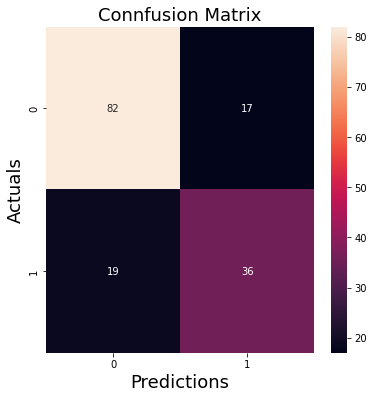

In [32]:
##see the different metrics
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

conf_matrix=confusion_matrix(y_test,y_pred_test)

plt.figure(figsize=(6,6))
import seaborn as sns
sns.heatmap(conf_matrix,annot=True)

#fig,ax=plot_confusion_matrix(conf_mat=conf_matrix,figsize=(6,6))
plt.xlabel('Predictions',fontsize=18)
plt.ylabel('Actuals',fontsize=18)
plt.title('Connfusion Matrix',fontsize=18)
plt.show()

In [33]:
##classification reports
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



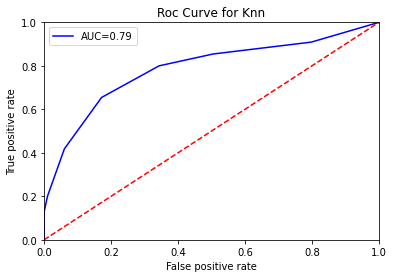

In [58]:
#roc Aoc curve for class 1
###plot roc_Auc curve
import numpy as np
from  sklearn.metrics import roc_curve
from  sklearn.metrics import auc
import matplotlib.pyplot as plt

y_score=knn_clf.predict_proba(x_test)
fpr,tpr,threshold=roc_curve(y_test,y_score[:,1],pos_label=1)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,'b',label="AUC=%0.2f" %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title('Roc Curve for Knn')
plt.show()

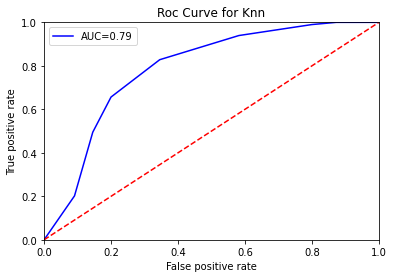

In [57]:
##roc Aoc curve for class 0
###plot roc_Auc curve 
import numpy as np
from  sklearn.metrics import roc_curve
from  sklearn.metrics import auc
import matplotlib.pyplot as plt

y_score=knn_clf.predict_proba(x_test)
fpr,tpr,threshold=roc_curve(y_test,y_score[:,0],pos_label=0)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,'b',label="AUC=%0.2f" %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title('Roc Curve for Knn')
plt.show()

0.7865932047750229
0.7865932047750229


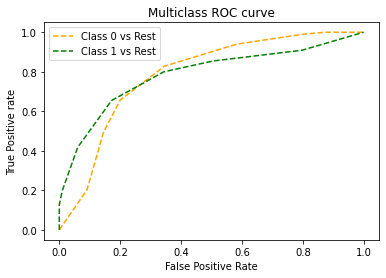

In [53]:
# multi-class classification
#https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

pred_prob = knn_clf.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    print(auc(fpr[i],tpr[i]))
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

### Grid search with pipeline and ROC/AUC curve

In [2]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/MODEL_SELECTION_KFOLD/wisc_bc_data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,911320502,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,873885,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,911201,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [3]:
df.shape

(569, 32)

In [4]:
x=df.iloc[:,2:].values
y=df.iloc[:,1].values

In [5]:
x

array([[1.232e+01, 1.239e+01, 7.885e+01, ..., 9.391e-02, 2.827e-01,
        6.771e-02],
       [1.060e+01, 1.895e+01, 6.928e+01, ..., 7.926e-02, 2.940e-01,
        7.587e-02],
       [1.104e+01, 1.683e+01, 7.092e+01, ..., 7.431e-02, 2.998e-01,
        7.881e-02],
       ...,
       [1.528e+01, 2.241e+01, 9.892e+01, ..., 1.226e-01, 3.175e-01,
        9.772e-02],
       [1.453e+01, 1.398e+01, 9.386e+01, ..., 1.069e-01, 2.606e-01,
        7.810e-02],
       [2.137e+01, 1.510e+01, 1.413e+02, ..., 1.966e-01, 2.730e-01,
        8.666e-02]])

In [6]:
y

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M',
       'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [8]:
le.transform(['M','B'])

array([1, 0])

In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [11]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [12]:
#save 20% of data sets for final testing
#use rest of 80% for training and validation
#steps
#1.first divide the datasets into 80:20 ratio(training and testing)
#2.next divide the 8o part into training and validation(what ever ratio you prefer)
x_train1,x_test,y_train1,y_test=train_test_split(x,y,test_size=.20,random_state=1)
x_train2,x_val,y_train2,y_val=train_test_split(x_train1,y_train1,test_size=.25,random_state=1)

In [14]:
print("total Datasets:",len(x))
print("total test Datasets for future use:",len(x_test))
print("total training Datasets:",len(x_train2))
print("total validation Datasets:",len(x_val))

total Datasets: 569
total test Datasets for future use: 114
total training Datasets: 341
total validation Datasets: 114


In [17]:
##implement pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

pipe_lr = Pipeline([('scl', StandardScaler()),('pca',PCA(n_components=2)),('svc', SVC())])
pipe_lr.fit(x_train2,y_train2)
print("TestAccuracy:",pipe_lr.score(x_test,y_test))





TestAccuracy: 0.9649122807017544


### Grid search 

In [21]:
##implement pipeline and gridsearch for best tuning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

pipe_svc = Pipeline([('scl', StandardScaler()),('pca',PCA()),('svc', SVC())])
param_grid={"pca__n_components":[4,15],
            "svc__C":[0.001,0.01,0.1,1,10,100],
            "svc__gamma":[0.001,0.01,0.1,1,10,100],
            "svc__kernel":['rbf','poly']}
grid=GridSearchCV(pipe_svc,param_grid=param_grid,cv=5)
grid.fit(x_train2,y_train2)

print("Best cross validation Accuracy:",grid.best_score_)
print("best parameters:",grid.best_params_)
print("validation sets accuracy:",grid.score(x_val,y_val))


Best cross validation Accuracy: 0.9823529411764707
best parameters: {'pca__n_components': 15, 'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
test sets accuracy: 0.9649122807017544


In [23]:
##now supply the best paraameter and test
pipe_lr = Pipeline([('scl', StandardScaler()),('pca',PCA(n_components=15)),('svc', SVC(C=10,gamma=0.01,kernel='rbf',probability=True))])
pipe_lr.fit(x_train2,y_train2)
print("TestAccuracy:",pipe_lr.score(x_test,y_test))

TestAccuracy: 0.9649122807017544


In [24]:
y_pred=pipe_lr.predict(x_test)

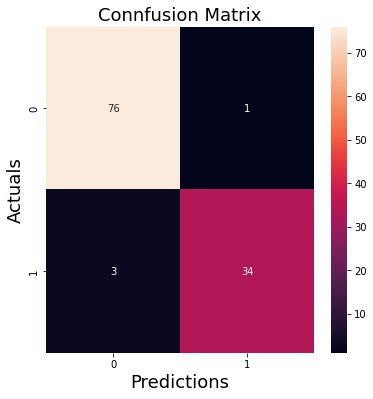

In [25]:
##see the different metrics
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

conf_matrix=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(6,6))
import seaborn as sns
sns.heatmap(conf_matrix,annot=True)

#fig,ax=plot_confusion_matrix(conf_mat=conf_matrix,figsize=(6,6))
plt.xlabel('Predictions',fontsize=18)
plt.ylabel('Actuals',fontsize=18)
plt.title('Connfusion Matrix',fontsize=18)
plt.show()

In [27]:
##classification reports
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        77
           1       0.97      0.92      0.94        37

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



0.9877149877149877
0.9877149877149878


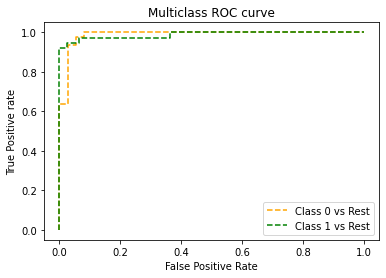

In [29]:
# multi-class classification
#https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

pred_prob = pipe_lr.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    print(auc(fpr[i],tpr[i]))
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

### Random Search CV

In [31]:
##implement pipeline and gridsearch for best tuning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

pipe_svc = Pipeline([('scl', StandardScaler()),('pca',PCA()),('svc', SVC())])
param_grid={"pca__n_components":[4,15],
            "svc__C":[0.001,0.01,0.1,1,10,100],
            "svc__gamma":[0.001,0.01,0.1,1,10,100],
            "svc__kernel":['rbf','poly']}
grid=RandomizedSearchCV(pipe_svc,param_distributions=param_grid,cv=5)
grid.fit(x_train2,y_train2)

print("Best cross validation Accuracy:",grid.best_score_)
print("best parameters:",grid.best_params_)
print("validation sets accuracy:",grid.score(x_val,y_val))


Best cross validation Accuracy: 0.9706734867860188
best parameters: {'svc__kernel': 'rbf', 'svc__gamma': 0.01, 'svc__C': 100, 'pca__n_components': 15}
validation sets accuracy: 0.956140350877193


In [32]:
##now supply the best paraameter and test
pipe_lr = Pipeline([('scl', StandardScaler()),('pca',PCA(n_components=15)),('svc', SVC(C=100,gamma=0.01,kernel='rbf',probability=True))])
pipe_lr.fit(x_train2,y_train2)
print("TestAccuracy:",pipe_lr.score(x_test,y_test))

TestAccuracy: 0.9824561403508771


In [33]:
y_pred=pipe_lr.predict(x_test)

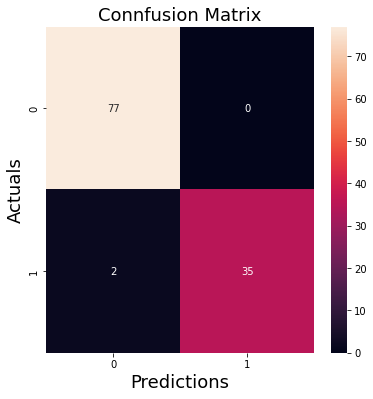

In [34]:
##see the different metrics
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

conf_matrix=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(6,6))
import seaborn as sns
sns.heatmap(conf_matrix,annot=True)

#fig,ax=plot_confusion_matrix(conf_mat=conf_matrix,figsize=(6,6))
plt.xlabel('Predictions',fontsize=18)
plt.ylabel('Actuals',fontsize=18)
plt.title('Connfusion Matrix',fontsize=18)
plt.show()

In [35]:
##classification reports
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        77
           1       1.00      0.95      0.97        37

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114

